## 1. Write code to determine the number of unique crop types in the dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/irungu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('./MD_agric_exam-4313.csv')
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [4]:

df.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


In [7]:
# Unique Crop Type in the Dataset
len(df['Crop_type'].unique())

8

## Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [12]:
df[df['Crop_type']=="wheat"]['Annual_yield'].max()

8.994376295629458

## Find the total rainfall for crop types where the average pollution level is above 0.2.

In [30]:
avg_pollution_crop=df.groupby('Crop_type')['Pollution_level'].mean()
avg_pollution_crop

high_pollution_crops=avg_pollution_crop[avg_pollution_crop>0.2].index
high_pollution_crops

total_rainfall=df[df['Crop_type'].isin(high_pollution_crops)]['Rainfall'].sum()
total_rainfall

941959.7

### Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [37]:
def temperature_range(df,id):
    field=df[df['Field_ID']==id]
    return field['Max_temperature_C']-field['Min_temperature_C']

temperature_range(df,5443)

892    33.4
dtype: float64

In [33]:
df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


### Write code to calculate the total plot size for plots where the pH is less than 5.5.



In [40]:
ph_less_5p5=df[df['pH']<5.5]
ph_less_5p5['Plot_size'].sum()

1731.8999999999999

### Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [47]:
temp_diff=df[(df['Min_temperature_C']<-5) & (df['Max_temperature_C']>30)]
temp_diff 

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
5,2274,270.45100,1665.2,-7.2,34.3,5.873082,0.001545,3.9,1.743458,banana
13,4807,520.29770,292.3,-6.3,32.9,5.379286,0.196589,1.4,0.881568,potato
14,973,432.03570,1464.4,-6.0,30.2,7.482802,0.019800,3.0,1.377434,wheat
...,...,...,...,...,...,...,...,...,...,...
990,1637,504.66306,1144.5,-5.7,32.1,5.666609,0.431891,4.8,2.486276,wheat
991,756,578.91270,889.4,-5.2,31.0,5.062155,0.442495,2.2,1.209928,cassava
992,1332,359.76013,1816.0,-6.4,32.9,7.350705,0.133453,2.9,1.225715,wheat
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat


### Numpy
Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).



In [66]:
median_plot_size=df['Plot_size'].median()
plot_larger_than_median=df[df['Plot_size']>median_plot_size]
plot_larger_than_median
np.std([12,21,33,34,453,45,34,234,43])
np.std(plot_larger_than_median['Rainfall'])


469.6199685856172

In [52]:
df.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


##
If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [69]:
df['Max_temperature_C'].mode()

0    30.7
Name: Max_temperature_C, dtype: float64

In [77]:
df['Crop_type'].value_counts()


Crop_type
wheat      244
potato     146
cassava    141
tea        137
banana     103
coffee      99
maize       82
rice        48
Name: count, dtype: int64

> Mode 1 30.+ mode 2 ice
> Word is 30.ice

###  Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

In [80]:
def categorize_elevation(elevation):
    if elevation<300:
        return 'Low'
    elif elevation>=300 and elevation<=600:
        return 'Medium'
    elif elevation>600:
        return 'High'
    else:
        raise f'Error the value {elevation} is not a number'
    
df['Elevation_ranges']=df['Elevation'].apply(categorize_elevation)
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Elevation_ranges
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee,Medium
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato,High
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana,Medium
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat,Medium
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava,High


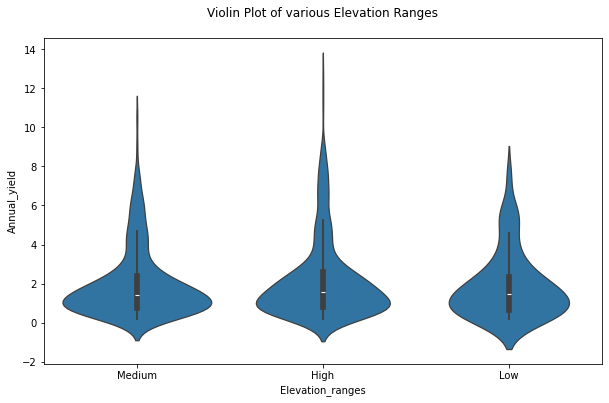

In [85]:
# violin plot
plt.figure(figsize=(10,6))

sns.violinplot(x="Elevation_ranges",y="Annual_yield",data=df)
plt.title("Violin Plot of various Elevation Ranges\n")

plt.show()

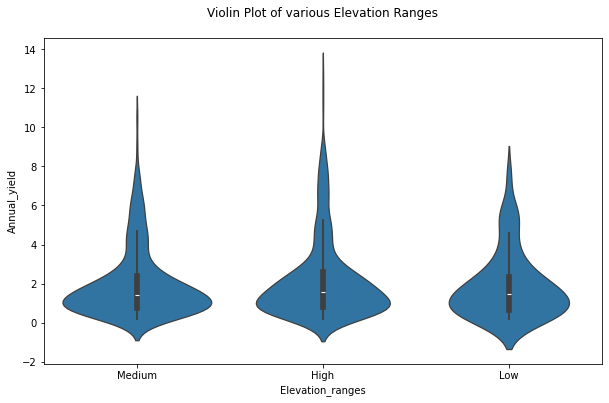

In [85]:
# violin plot
plt.figure(figsize=(10,6))

sns.violinplot(x="Elevation_ranges",y="Annual_yield",data=df)
plt.title("Violin Plot of various Elevation Ranges\n")

plt.show()

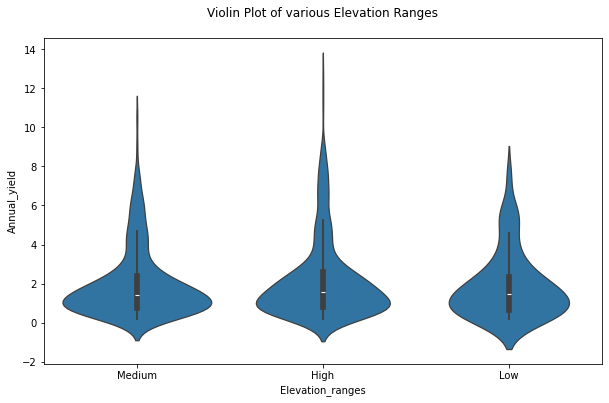

In [85]:
# violin plot
plt.figure(figsize=(10,6))

sns.violinplot(x="Elevation_ranges",y="Annual_yield",data=df)
plt.title("Violin Plot of various Elevation Ranges\n")

plt.show()

### Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [96]:
def sum_int_values(crops,unique_crops=None):
    if unique_crops is None:
        unique_crops=crops.unique()
     
    if len(unique_crops)==0:
        return 0;
    first_crop=unique_crops[0]
    rest_crops=unique_crops[1:]
    
    return len(first_crop)+sum_int_values(crops,rest_crops)

sum_int_values(df['Crop_type'])

42

In [97]:
df['Crop_type'].unique()

array(['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea',
       'rice'], dtype=object)

### Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [103]:
from scipy.stats import ttest_ind

coffee_annual_yield=df[df['Crop_type']=='coffee']
banana_annual_yield=df[df['Crop_type']=='banana']

banana_annual_yield
coffee_annual_yield
# perform individual t-test
t_stats,p_value=ttest_ind(coffee_annual_yield,banana_annual_yield)

print("P-value: ",round(p_value))

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Elevation_ranges,Crop_length
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee,Medium,6
24,1735,779.55380,1435.4,-2.9,29.7,5.296714,0.106638,2.6,1.199727,coffee,High,6
35,4811,959.18690,850.7,-1.8,28.0,6.113445,0.211440,3.6,1.423348,coffee,High,6
66,664,821.04470,2243.5,-1.8,31.5,5.456049,0.373333,2.3,1.404096,coffee,High,6
67,2895,715.32020,1072.6,-3.8,33.0,5.811127,0.137442,12.6,5.054496,coffee,High,6
...,...,...,...,...,...,...,...,...,...,...,...,...
951,4531,515.09973,1963.0,-4.8,33.7,5.809697,0.014995,4.5,2.437925,coffee,Medium,6
957,227,596.96045,971.2,-5.0,29.9,6.412883,0.904501,1.2,0.333577,coffee,Medium,6
967,2534,364.18640,1695.5,-6.4,32.5,6.299957,0.044159,7.8,4.169957,coffee,Medium,6
984,1348,609.68860,1582.8,-4.3,28.7,5.726865,0.137010,2.4,1.032982,coffee,High,6
